# Getting our workspace ready

Upload date to google drive, connect to drive, import libraries, check GPU

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub  # an open repository and library for reusable machine learning

In [ ]:
# check version
tf.__version__

'2.8.2'

In [ ]:
# check if GPU available
print("GPU", "Available " if tf.config.list_physical_devices("GPU") else "Not available :(")   #GPU is for super fast numerical computing

GPU Not available :(


## Access the Data

In [ ]:
import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/Colab Notebooks/Dog_Classification_Project/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# view df info
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
breeds_count = labels_csv["breed"].value_counts()
breeds_count

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

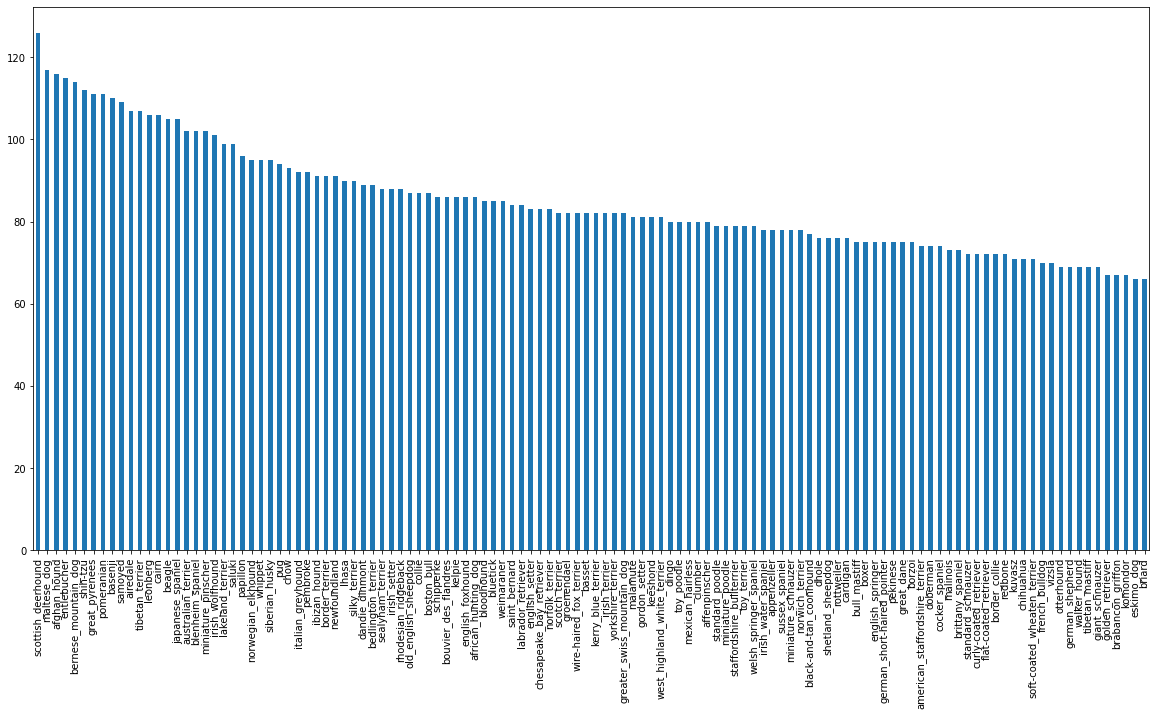

In [ ]:
import matplotlib.pyplot as plt
breeds_count.plot.bar(figsize=(20,10))

minimun number of images per class reccomended by google is 10. 100 is better.

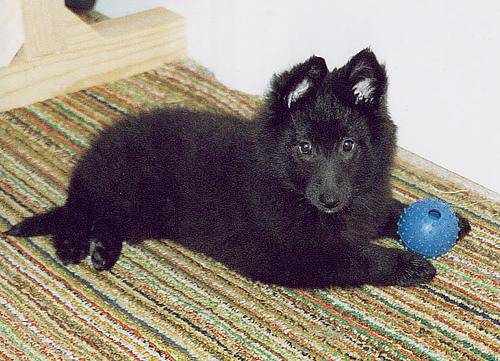

In [ ]:
# view an image
from IPython.display import display, Image
Image("drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/010e87fdf252645a827e37470e65e842.jpg") #copy file path

In [ ]:
labels_csv.columns

Index(['id', 'breed'], dtype='object')

In [ ]:
# create pathnames from image ID's
file_paths = ["drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/" + id_name + ".jpg" for id_name in labels_csv["id"]]

In [ ]:
file_paths[:5]

['drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
len(file_paths)

10222

## View 5 images from list of file_paths

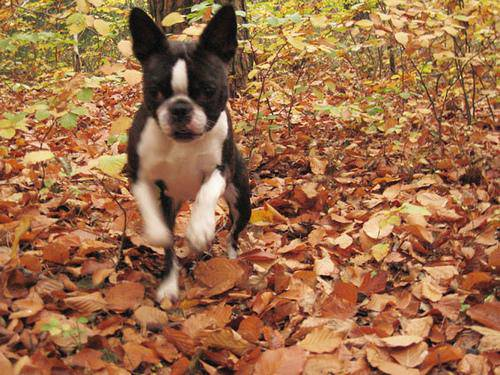

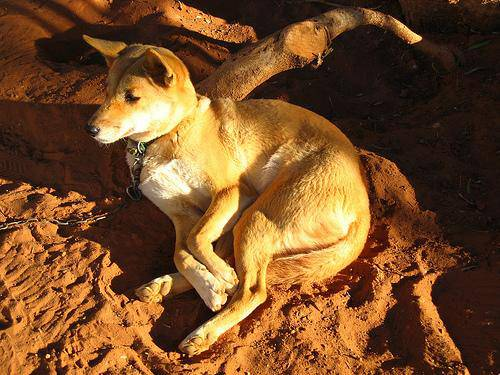

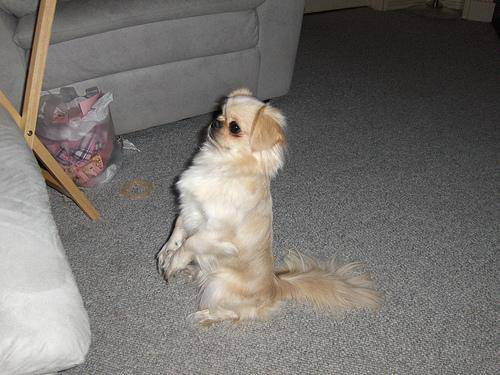

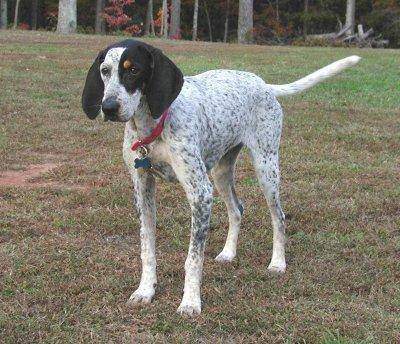

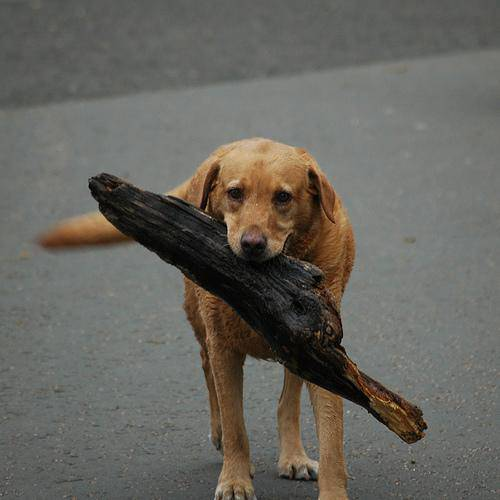

In [ ]:
for path in file_paths[:5]:
    img = Image(path)
    display(img)

Another way to view image without for loop

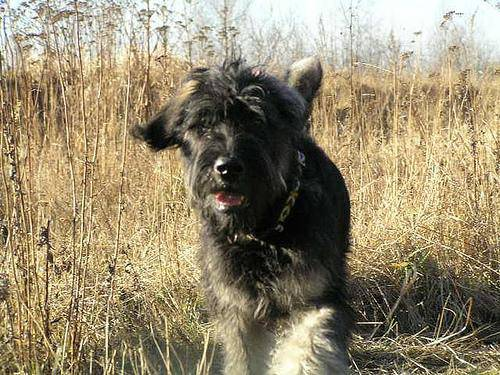

In [ ]:
Image(file_paths[36])

## Getting labels and turning them into an array

In [ ]:
import numpy as np
labels = np.array(labels_csv["breed"]) # convert labels colum to Numpy array
labels[:5]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
      dtype=object)

In [ ]:
len(labels) #check count. Have same number on images and labels

10222

Find unique label breeds

In [ ]:
unique_breeds = labels_csv["breed"].unique()   # or np.unique(labels)
len(unique_breeds)

120

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
type(labels_csv["breed"])

pandas.core.series.Series

Turn one label into an array of booleans

In [ ]:
type(unique_breeds)

numpy.ndarray

In [ ]:
labels[0] == unique_breeds

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

Turn every label into a boolean array

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal


## Turning a boolean array into integers

In [ ]:
## Turning a boolean array into integers for one label example
print("Orginal label :", labels[0]) 
print("*"*30)
print("label turned into array :", boolean_labels[0])
print("*"*30)
print("Boolean as numeric: ", boolean_labels[0].astype("int"))


Orginal label : boston_bull
******************************
label turned into array : [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
******************************
Boolean as numeric:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Split Data

In [ ]:
# Split X/y. Assigning images to X and breed type to y
X = file_paths
y = boolean_labels

Let's start experimenting with 1000 and increase it as we need.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 10000 #@param {type:"slider", min:1000, max:10000, step: 1000}

#### Split Train/Valid

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES],
                                                      y[:NUM_IMAGES],
                                                      train_size= 0.8)
len(X_train), len(X_valid), len(y_train), len(y_valid)

(8000, 2000, 8000, 2000)

In [ ]:
X_train[:5]

['drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/a8cb1a353bf80b0c55919bf5d929c694.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/5f652b4b42ee2ca369388f36f11bcf6a.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/dfc726ff7000561805073a11d0d64178.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/10f790eb0fe5653c1980ddd983ec79c4.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/937af3a67d2b55afb480c7c624f470d6.jpg']

In [ ]:
y_train[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

# Preprocessing images (turning images into Tensors)

In [ ]:
# A Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

In [ ]:
#turn image into np.array([]),  view image shape
from matplotlib.pyplot import imread
np_image = imread(file_paths[0])
np_image.shape

(375, 500, 3)

In [ ]:
# output is height, width, colour channel value. 3 means RGB colors

In [ ]:
# view image. its now an array
np_image

array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  80],
        [192, 140,  82]]

In [ ]:
# turn image into tensors
tensor_image = tf.constant(np_image)
tensor_image

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

## Creating Helper Functions

#### Create function to convert images to tensors

In [ ]:
# Define Image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)   #read in image file
  image = tf.image.decode_jpeg(image, channels =3)  # turn into tensor with 3 color channels
  image = tf.image.convert_image_dtype(image, tf.float32) # standardize values to 0-1
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) # resize image to (224, 224)
  return image

#### Creating data batches function

In [ ]:
# Find patterns in your dataset, bitesizes at a time. We will go with 32 images/labels at a time

In [ ]:
# Create function to return a tuple
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)  #function from above
  return image, label  # returns image as tensor and boolean labels in a tuple format

In [ ]:
# Create function that turns data into batches that accomodates for training, validation, and testing data that will be passed through. Data may or may not have labels.
BATCH_SIZE = 32

def create_data_batches(X, y=None, bacth_size = BATCH_SIZE, valid_data= False, test_data= False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if its validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:  # Test Data: pass in image only, not labels
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only image filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE) #takes tensor flow data set 'X' which is now 'data' variable and 
    return data_batch                                      # use the process_image function to turn into normalized and resized tensor and then batch it 32 images at a time

  elif valid_data: # Validation Data: image and label. But no need to shuffle data
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)   # passing a tuple of image filepaths & label this time
    return data_batch

  else: # Training Data: image and label. shuffle training dataset
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  #filepaths                                           
                                              tf.constant(y))) #labels

    # shuffling filespaths and labels
    data = data.shuffle(buffer_size=len(X))
    # Create image, label tuple
    data = data.map(get_image_label)
    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)      #same as Valid code just split in two. map data then batch it

  return data_batch

# Create training and validation data batches

In [ ]:
train_data_batch = create_data_batches(X_train, y_train)
valid_data_batch = create_data_batches(X_valid, y_valid, valid_data= True)

Creating training data batches...
Creating validation data batches...


In [ ]:
#view attributes
train_data_batch.element_spec, valid_data_batch.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#Visualizing data batches

Create Function to view images in a data batches

In [ ]:
import matplotlib.pyplot as plt
def show_32_images(images, labels):
  """
  Displays 32 images from a data batch.
  """
  plt.figure(figsize=(15,15))
  for i in range(32):
    ax = plt.subplot(8, 4, i+1) #create subplots 4 rows, 8 columns, index + i
    plt.imshow(images[i]) #display image
    plt.title(unique_breeds[labels[i].argmax()]) #add image label as title
    plt.axis("off") #turn of gridlines

In [ ]:
#title of our plot
unique_breeds[y[0].argmax()]

'boston_bull'

In [ ]:
#unwinding batch of tensors with `as_numpy_iterator`

train_images, train_labels, = next(train_data_batch.as_numpy_iterator())

This will turn our a data batch into something which can be iterated over.

Passing an iterable to next() will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

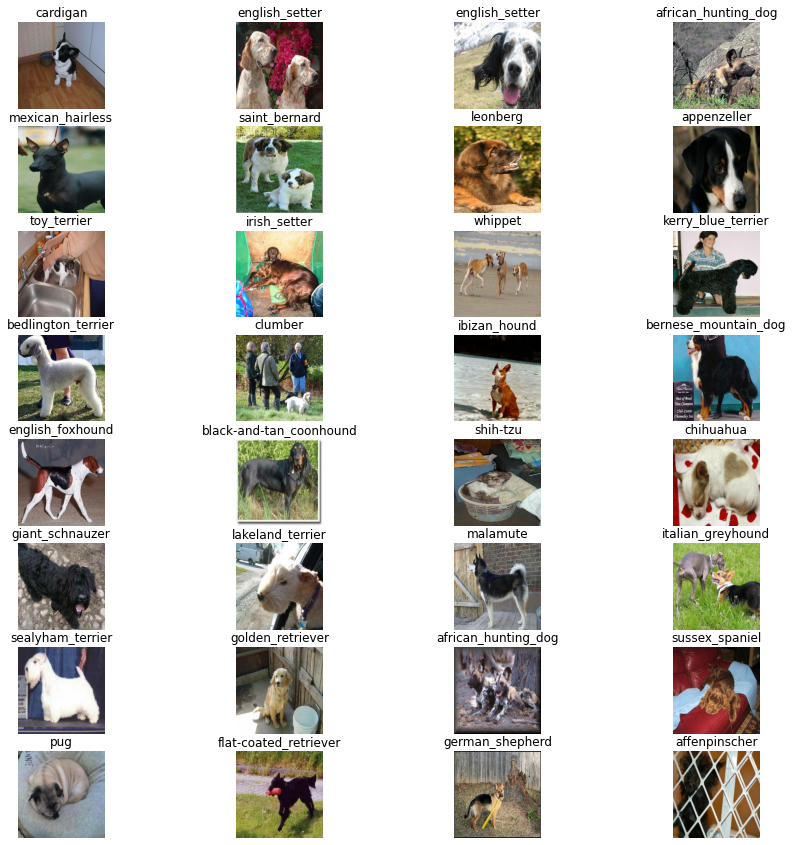

In [ ]:
# Now plot images and their labels
show_32_images(train_images, train_labels)

# Create and Train Model

 Use an existing model from TensorFlow Hub. Transfer Learning. Build model:
 
* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)  # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the Keras API.

## Create function for model
* tf is like a pipeline for complex numerical computing
* keras is a wrapper inside tf which is a high-level neural network library

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer. the model link)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,     # Output shape is number of unique labels we have
                          activation="softmax")]) # Layer 2 (output layer. softmax is like probability its that label. like predict_proba)

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(), #Our model wants to reduce this - wrong guesses
      optimizer = tf.keras.optimizers.Adam(), # Coach Adam
      metrics=["accuracy"]  # Scored with accuracy by judge. We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE)      #Let the model know what king od inputs it'll be getting

  return model

In [ ]:
# Run model
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.



*   Load TensorBoard notebook extension
*   Create tensorboard callback that saves logs
*   Visualize model



In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime
import os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Colab Notebooks/Dog_Classification_Project/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3) #  <--explain

## Training a model (on subset of data)
Train on 1000 images, to make sure everything is working

The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset. The number of epochs can be set to an integer value between one and infinity.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:1000, step:10}

In [ ]:
# check if GPU available
print("GPU", "Available " if tf.config.list_physical_devices("GPU") else "Not available :(")   #GPU is for super fast numerical computing

GPU Available 


### Create a function that trains a model
Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x= train_data_batch,
            epochs = NUM_EPOCHS,
            validation_freq=1, # specifies how many training epochs to run before a new validation run is performed
            callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
# model = train_model()

### Checking the TensorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

In [ ]:
# %tensorboard --logdir "drive/MyDrive/Colab Notebooks/Dog_Classification_Project/logs"

#Making and evaluating predictions using a trained model

In [ ]:
valid_data_batch

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
predictions = model.predict(valid_data_batch, verbose = 1)

63/63 [==============================] - 593s 9s/step


In [ ]:
predictions[0]

array([9.8527409e-03, 3.5782458e-04, 2.2987669e-02, 2.0596871e-02,
       1.5612666e-03, 1.4976580e-03, 8.5963076e-04, 1.2194809e-02,
       2.2399791e-03, 2.4356472e-03, 4.1287565e-03, 3.6986082e-04,
       2.6118744e-03, 2.4417085e-03, 1.5722705e-03, 1.0808974e-03,
       6.6466536e-03, 1.7027233e-03, 8.6719618e-04, 3.3489820e-03,
       1.6647564e-03, 9.4958186e-02, 4.3031556e-04, 5.4227792e-02,
       2.3087503e-02, 8.1004510e-03, 1.9590938e-02, 9.0451911e-03,
       1.8896546e-02, 2.0878229e-03, 2.5438813e-03, 1.9859187e-03,
       1.2652298e-02, 2.6417505e-02, 5.8068163e-03, 4.1106162e-03,
       4.2259861e-03, 1.2841445e-02, 8.2951440e-03, 2.6439442e-03,
       4.1556201e-04, 6.3208479e-04, 3.6475592e-04, 1.2798949e-04,
       2.3435177e-04, 1.5820501e-03, 1.5950248e-02, 1.2760011e-02,
       2.6426543e-03, 1.7043611e-03, 1.7735390e-04, 2.0945538e-03,
       2.4082169e-02, 3.6971031e-03, 1.2032929e-03, 3.8138211e-02,
       2.1187763e-03, 4.3369018e-02, 1.3217182e-03, 7.3910886e

First Prediction

In [ ]:
index = 0
print(predictions[index])
print("-"*80)
print(f"Max value [Probability of Prediction]: {np.max(predictions[index])}")
print("-"*80)
print(f"Number of values [Confidence Intervals]: {len(predictions[index])}")
print("-"*80)
print(f"Sum of all preidctions values: {np.sum(predictions[index])}")
print("-"*80)
print(f"Predictd label: {unique_breeds[np.argmax(predictions[index])]}")  # gives the index number of the largest value [np.max]
                                                                          # which is then passed to unique_breeds

[9.8527409e-03 3.5782458e-04 2.2987669e-02 2.0596871e-02 1.5612666e-03
 1.4976580e-03 8.5963076e-04 1.2194809e-02 2.2399791e-03 2.4356472e-03
 4.1287565e-03 3.6986082e-04 2.6118744e-03 2.4417085e-03 1.5722705e-03
 1.0808974e-03 6.6466536e-03 1.7027233e-03 8.6719618e-04 3.3489820e-03
 1.6647564e-03 9.4958186e-02 4.3031556e-04 5.4227792e-02 2.3087503e-02
 8.1004510e-03 1.9590938e-02 9.0451911e-03 1.8896546e-02 2.0878229e-03
 2.5438813e-03 1.9859187e-03 1.2652298e-02 2.6417505e-02 5.8068163e-03
 4.1106162e-03 4.2259861e-03 1.2841445e-02 8.2951440e-03 2.6439442e-03
 4.1556201e-04 6.3208479e-04 3.6475592e-04 1.2798949e-04 2.3435177e-04
 1.5820501e-03 1.5950248e-02 1.2760011e-02 2.6426543e-03 1.7043611e-03
 1.7735390e-04 2.0945538e-03 2.4082169e-02 3.6971031e-03 1.2032929e-03
 3.8138211e-02 2.1187763e-03 4.3369018e-02 1.3217182e-03 7.3910886e-03
 5.1697060e-03 8.0523355e-04 9.9618668e-03 4.6959925e-03 4.9650134e-04
 5.0241733e-03 1.1805550e-03 2.4922483e-03 1.4103455e-02 3.7427060e-03
 5.074

In [ ]:
np.argmax(predictions[index])

21

## Turn prediction probabilities into their respective label

In [ ]:
def get_pred_label(prediction_probabilites):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilites)]

In [ ]:
get_pred_label(predictions[0])     #remember, predictions here is y_preds of the valid_data_batch we predicted labels for

'irish_water_spaniel'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
valid_data_batch

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#unwinding batch of tensors with `as_numpy_iterator`

def unbatch_data(data):
  """
  Takes a batched dataset of (image, label) Tenseors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])  #argmax is performed on boolean values and returns index of 'True' value
  return images, labels

Unbatchify the validation data

In [ ]:
valid_images, valid_labels = unbatch_data(valid_data_batch)

In [ ]:
# view valid image from valid data set
valid_images[0]

array([[[0.6486324 , 0.56795186, 0.40370962],
        [0.65593565, 0.5874328 , 0.4189622 ],
        [0.7110475 , 0.6482434 , 0.47770542],
        ...,
        [0.19373964, 0.22278374, 0.07606225],
        [0.32016474, 0.39440542, 0.17990877],
        [0.25446323, 0.34197196, 0.11785413]],

       [[0.61226827, 0.5702872 , 0.37972346],
        [0.6010849 , 0.5687845 , 0.37667802],
        [0.6262798 , 0.59579307, 0.40336835],
        ...,
        [0.12620991, 0.1420327 , 0.01395519],
        [0.40350476, 0.43111333, 0.26375073],
        [0.37651685, 0.40506276, 0.22830978]],

       [[0.4178578 , 0.40840402, 0.2605311 ],
        [0.28590512, 0.28306198, 0.13263656],
        [0.23463762, 0.23485646, 0.08424371],
        ...,
        [0.48666453, 0.47054058, 0.34238356],
        [0.48881945, 0.46030232, 0.33901724],
        [0.5410866 , 0.5090576 , 0.3869112 ]],

       ...,

       [[0.5696936 , 0.54061574, 0.42018482],
        [0.6731597 , 0.6612515 , 0.48543194],
        [0.63230217, 0

In [ ]:
# view valid image from valid data set
valid_labels[0]

'airedale'

# Visualize Prediction

Now we've got ways to get get:

* Prediction labels
* Validation labels (truth labels)
* Validation images
>Let's make some function to make these all a bit more visaulize.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob) # returns predicted dogbreed name

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [ ]:
 plot_pred(prediction_probabilities=predictions,
          labels= valid_labels,
          images= valid_images,
          n= 0)

NameError: ignored

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

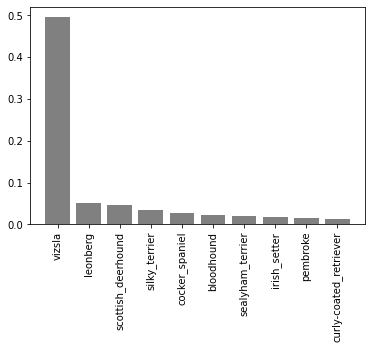

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=valid_labels,
               n=9)

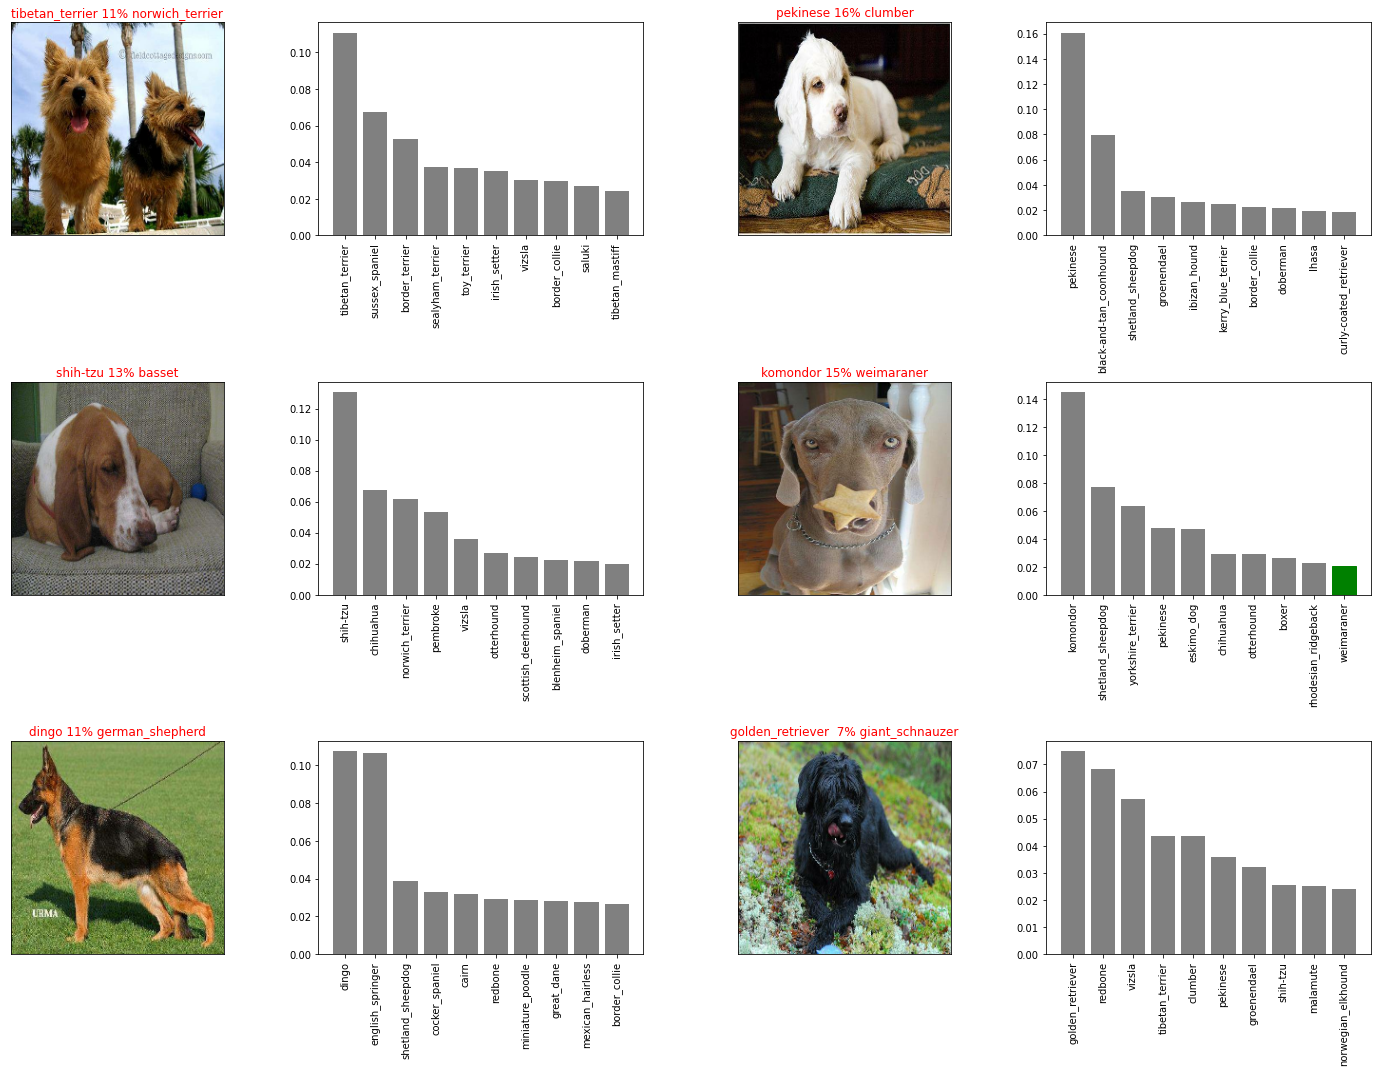

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=valid_labels,
            images=valid_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=valid_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Training on Full Data Set

In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 2547s 8s/step - loss: 1.3305 - accuracy: 0.6684
Epoch 2/100
320/320 [==============================] - 38s 119ms/step - loss: 0.3999 - accuracy: 0.8809
Epoch 3/100
320/320 [==============================] - 39s 120ms/step - loss: 0.2352 - accuracy: 0.9356
Epoch 4/100
320/320 [==============================] - 36s 114ms/step - loss: 0.1532 - accuracy: 0.9639
Epoch 5/100
320/320 [==============================] - 38s 117ms/step - loss: 0.1076 - accuracy: 0.9762
Epoch 6/100
320/320 [==============================] - 38s 118ms/step - loss: 0.0770 - accuracy: 0.9871
Epoch 7/100
320/320 [==============================] - 39s 121ms/step - loss: 0.0584 - accuracy: 0.9925
Epoch 8/100
320/320 [==============================] - 38s 118ms/step - loss: 0.0470 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 38s 117ms/step - loss: 0.0379 - accuracy: 0.9952
Epoch 10/100
320/320 [==============================] - 38s 119ms

# Save Model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Colab Notebooks/Dog_Classification_Project",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Colab Notebooks/Dog_Classification_Project/20220609-22231654813392-full-image-set-mobilenetv2-Adam.h5...


'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/20220609-22231654813392-full-image-set-mobilenetv2-Adam.h5'

### Load Model

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
loaded_full_model = load_model("drive/MyDrive/Colab Notebooks/Dog_Classification_Project/20220609-22231654813392-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Colab Notebooks/Dog_Classification_Project/20220609-22231654813392-full-image-set-mobilenetv2-Adam.h5


# Making predictions onthe test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

In [ ]:
import os

test_path = "drive/MyDrive/Colab Notebooks/Dog_Classification_Project/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

In [ ]:
len(test_filenames)

10357

In [ ]:
test_filenames[:5]

['drive/MyDrive/Colab Notebooks/Dog_Classification_Project/test/e974e77b0f9076d31a225812064b4ac9.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/test/e91c648dc54d6f418636ec7bc1566912.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/test/e7b608110b0e29120d8740f37e85f3d0.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/test/e904aa7e76ba608b3f658aa3817e12b9.jpg']

##Creat test batches

In [ ]:
# Create test data batch
test_data_batch = create_data_batches(test_filenames, test_data=True)

Creating test data batches....


In [ ]:
test_data_batch

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predictions = loaded_full_model.predict(test_data_batch,
                                     verbose= 1)

324/324 [==============================] - 617s 2s/step


## Make predictions on test data

In [ ]:
custom_path = "drive/MyDrive/Colab Notebooks/Dog_Classification_Project/custom_pics/"
custom_image_paths = [ custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['drive/MyDrive/Colab Notebooks/Dog_Classification_Project/custom_pics/dixie3.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/custom_pics/dixie1.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/custom_pics/dixie2.jpg']

#### Turn custom images into batch datasets

In [ ]:
custom_data_batch = create_data_batches(custom_image_paths, test_data= True)
custom_data_batch

Creating test data batches....


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

#### Make predictions

In [ ]:
custom_preds = loaded_full_model.predict(custom_data_batch)

In [ ]:
custom_preds[0]

array([3.62051810e-06, 3.40251299e-11, 2.38119750e-11, 9.40349101e-12,
       7.68060042e-16, 1.03236115e-12, 3.39075357e-15, 1.22772487e-10,
       7.03782321e-09, 2.07091339e-14, 2.54349319e-15, 3.67317201e-12,
       3.24815435e-12, 4.43274323e-13, 3.35721164e-12, 2.35031816e-09,
       9.56881818e-13, 1.62475187e-12, 3.93537281e-04, 1.55355682e-13,
       1.07128750e-11, 8.74260220e-10, 1.54382049e-10, 4.45796747e-13,
       1.41467362e-08, 5.06607343e-08, 2.87304652e-10, 2.19898925e-12,
       1.34340178e-06, 4.24727354e-12, 7.53048388e-11, 6.12241079e-16,
       6.53518836e-11, 1.34641620e-13, 6.08835790e-13, 4.70426580e-11,
       2.75570727e-07, 3.28409418e-11, 2.29864498e-14, 1.64312235e-13,
       5.46505410e-11, 8.52256668e-11, 1.03243170e-09, 3.79414544e-09,
       4.42124670e-11, 1.41413389e-12, 2.22365147e-11, 2.95508831e-15,
       5.96479409e-13, 2.89892173e-11, 1.95449939e-14, 1.78882851e-06,
       3.65998447e-11, 1.97166242e-11, 3.73971267e-17, 1.06477810e-05,
      

In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
np.max(custom_preds)

0.9998635

In [ ]:
np.argmax(custom_preds)

188

In [ ]:
len(custom_preds)

3

In [ ]:
# Get prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i] for i in range(len(custom_preds)))]
custom_pred_labels[:3]

['boston_bull']

In [ ]:
# Work around code to plot labels below
y= []
for i in range(len(custom_preds)):
  x = get_pred_label(custom_preds[i])
  y.append(x)
print(y)

['mexican_hairless', 'american_staffordshire_terrier', 'american_staffordshire_terrier']


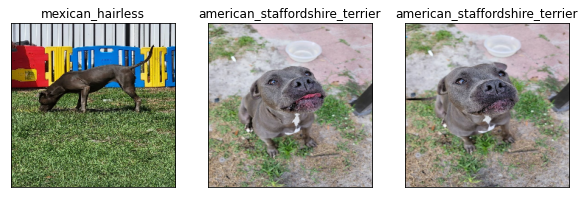

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(y[i])
  plt.imshow(image)

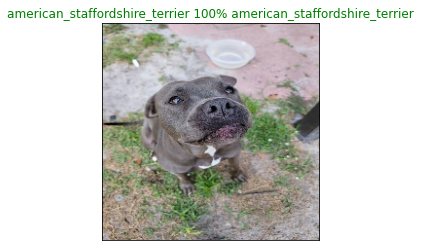

In [ ]:
 plot_pred(prediction_probabilities=custom_preds,
          labels= y,
          images= custom_images,
          n= 2)

In [ ]:
import random
american_stafford_rows = labels_csv[labels_csv["breed"] == "american_staffordshire_terrier"]
american_stafford_id = american_stafford_rows["id"]

In [ ]:
file_paths1 = ["drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/" + id_name + ".jpg" for id_name in american_stafford_id]
file_paths1[:5]

['drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/02f3d5fd1eea0a2e6f4742bc54b51ba9.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/041d0d6a8d110b35a3795dd5c68f9a36.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/08149eb72785553570f74a6effea8d7e.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/087cd02ca089fc0f30841a6a89e3a619.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_Classification_Project/train/11a508588bc3dec81bd4ce4913f963cd.jpg']

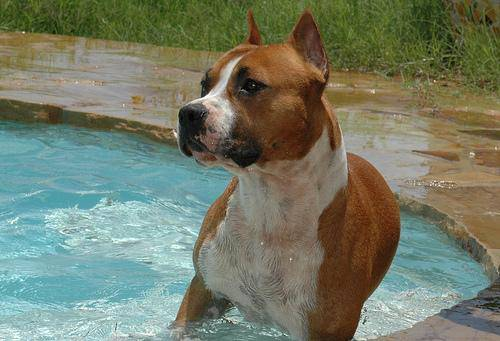

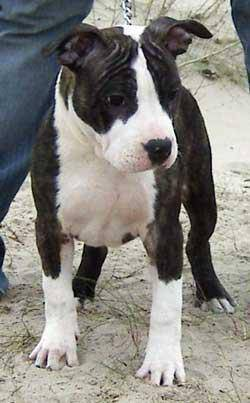

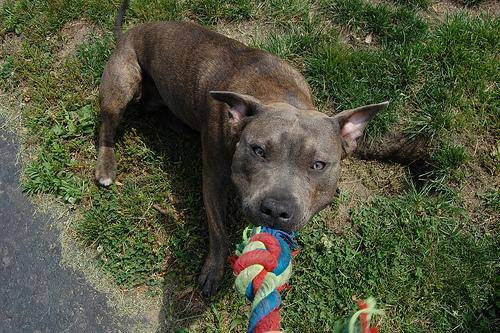

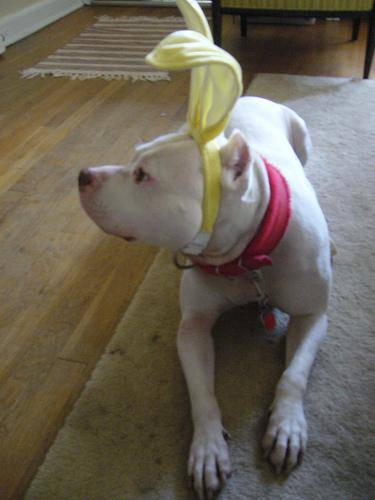

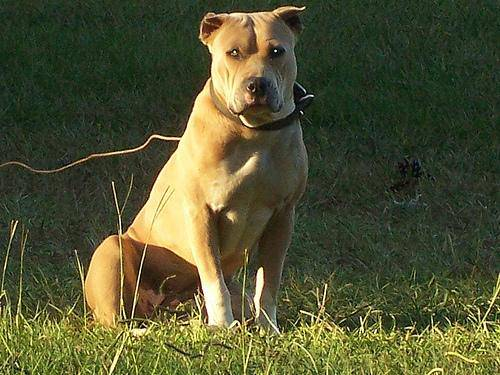

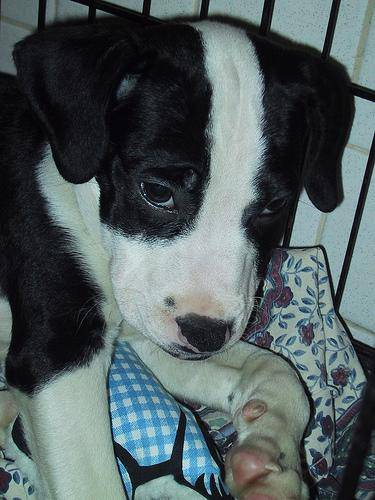

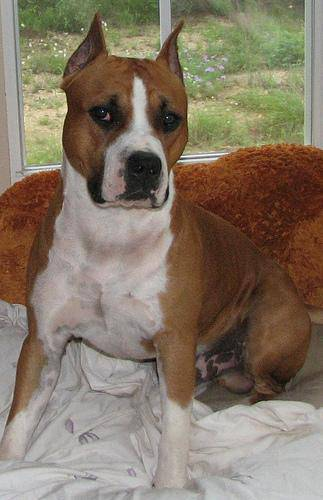

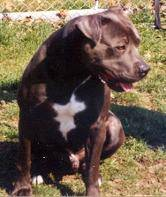

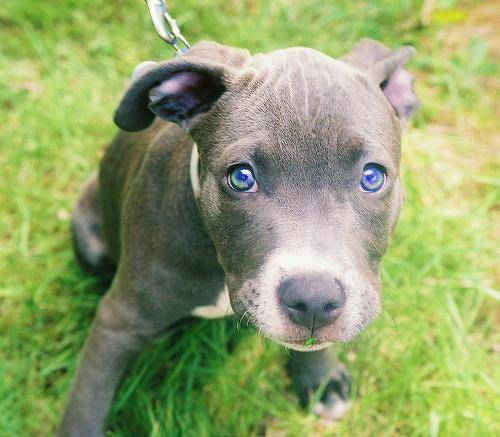

In [ ]:
#Example images of american_staffordshire from training data
for path in file_paths1[10:19]:
    img = Image(path)
    display(img)

In [ ]:
#How to plot images???